# Computational Methods in Economics

## Problem Set 6 - Dynamic Programming

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2019-01-30 16:11:03.386975


### Preliminaries

#### Import Modules

In [2]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import numpy as np
import scipy.optimize
import scipy.linalg

import funapprox_cme as fa

## Question 1 (A)

Consider the following version of the NGM:

\begin{equation}
    \max_{\left\{C_t, K_{t+1}, h_{t} \right\}_{t = 0}^\infty} \sum^\infty_{t = 0} \beta^t \left[\log(C_t) - B \frac{h_t^{1+\eta}}{1+\eta}\right]
\end{equation}

s.t.

\begin{equation}
    C_t + K_{t + 1} =  A_t K_t^\alpha h_{t}^{1-\alpha} + (1 - \delta) K_t
\end{equation}

Compared to the standard model that we have seen so far, there are two changes:

- The per-period utility function features the logarithm of consumption: 

\begin{equation}
     u(c_t, h_{t})  = \left[\log(C_t) - B \frac{h_t^{1+\eta}}{1+\eta}\right]
\end{equation}

- Productivity $A_t$ depends on time, rather than being constant.

(a) Following the lecture, we can see that this version of the model is in general *not stationary*: show that the set of feasible values for $K_{t+1}$ - the correspondence $\tilde{G}(t, x_t)$ in the notation of the generic intertemporal optimization problem - depends explicitly on time. 

(b) Assume $A_t = (1 + g) A_{t-1}$ for all $t$, where $g$ is a constant growth rate. Show that under this assumption, we can transform the model into a stationary dynamic optimization problem.

### Answer

(a) The set of feasible values for $K_{t+1}$ is bounded below by zero (as capital cannot be negative), and bounded above by

\begin{equation}
    K_{t + 1} \le A_t K_t^\alpha h_{t}^{1-\alpha} + (1 - \delta) K_t
\end{equation}

due to the resource constraint (as consumption cannot be negative). Hence, the upper bound depends on $A_t$, and hence explicitly on time. Therefore, the problem is not stationary.

(b) Let $A_t = (1 + g) A_{t-1}$, and thus $A_t = (1 + g)^t A_0$. The goal in the following is to write the problem without $A_t$ appearing explicitly. 

Write the resource constraint as 

\begin{equation}
    C_t + K_{t + 1} =  K_t^\alpha (\tilde{A}_t h_{t})^{1-\alpha} + (1 - \delta) K_t
\end{equation}
where
\begin{equation}
    \tilde{A}_t^{1-\alpha} = A_t = (1 + g)^t A_0
\end{equation}
Hence
\begin{equation}
    \tilde{A}_t = [(1 + g)^t A_0]^{\frac{1}{1- \alpha}} = (1 + g)^{\frac{t}{1- \alpha}} A_0^{\frac{1}{1- \alpha}}
\end{equation}

Next, divide both sides of the resource constraint by $\tilde{A}_t$:
\begin{equation}
    \frac{C_t}{\tilde{A}_t} + \frac{K_{t + 1}}{\tilde{A}_t}  =  \frac{K_t^\alpha (\tilde{A}_t h_{t})^{1-\alpha}}{\tilde{A}_t^\alpha \tilde{A}_t^{1 - \alpha}}  + (1 - \delta) \frac{K_t}{\tilde{A}_t} 
\end{equation}

We can define consumption, capital and output in "efficiency units", i.e. per level of productivity:
\begin{equation}
    c_t = \frac{C_t}{\tilde{A}_t}, k_t = \frac{K_t}{\tilde{A}_t}
\end{equation}

Hence,

\begin{equation}
    c_t + \frac{K_{t + 1}}{\tilde{A}_t} \frac{\tilde{A}_{t + 1}}{\tilde{A}_{t+1}}  =  \frac{K_t^\alpha}{\tilde{A}_t^\alpha} h_{t}^{1-\alpha}  + (1 - \delta) k_t 
\end{equation}
\begin{equation}
    c_t + k_{t + 1} \frac{\tilde{A}_{t + 1}}{\tilde{A}_{t}}  =  k_t^\alpha h_{t}^{1-\alpha}  + (1 - \delta) k_t 
\end{equation}
\begin{equation}
    c_t + (1 + g) k_{t + 1}  =  k_t^\alpha h_{t}^{1-\alpha}  + (1 - \delta) k_t 
\end{equation}
Hence, by writing the resource constraint in efficiency units, productivity no longer shows up explicitly.


What about the objective function? Note that 

\begin{equation}
    \sum^\infty_{t = 0} \beta^t \log(C_t) = \sum^\infty_{t = 0} \beta^t \log(\tilde{A}_t c_t) = \sum^\infty_{t = 0} \beta^t \log(c_t) + \sum^\infty_{t = 0} \beta^t \log(\tilde{A}_t)
\end{equation}

The second term is completely exogenous (i.e. does not contain a control variable), and thus will not have an effect on the result of the optimization (and will drop out when taking first-order conditions). 

Thus, both the objective function and the resource constraint do no longer depend on time, and hence we have transformed the model into a stationary one. 

## Question 2 (A)

In the lecture, we have shown that an optimal plan $\{x_t^*, y_t^*\}_{t = 0}^\infty$ that solves a sequential dynamic optimization problem also satisifies the Bellman equation in every period. One way to illustrate this point is to show that both the sequential and the recursive formulation of the problem give rise to the same first-order conditions.

(a) Solve for the Euler equation and the intratemporal optimality condition in the sequential version of the general NGM:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, h_{t} \right\}_{t = 0}^\infty} \sum^\infty_{t = 0} \beta^t u(c_t, h_{t}) 
\end{equation}

s.t.

\begin{equation}
    c_t + k_{t + 1} = f(k_t, h_{t}) + (1 - \delta) k_t
\end{equation}

and $k_0$ given.

(b) [OPTIONAL] Write down the corresponding Bellman equation and take the first-order conditions for the optimization problem on the right-hand side. Then, compute the derivative of the value function $V$ with respect to the state $k_t$, using the policy functions $ \phi(k_t) \equiv k_{t +1}$ and $\pi( k_t) \equiv h_{t}$ on the right-hand side. Show that combining these expressions gives the same optimality conditions as in (a).

### Answer

(a) The easiest way to find the optimality conditions is to substitute the resource constraint in the objective function and take the derivatives with respect to $k_{t+1}$ and $h_t$:

\begin{equation}
    \max_{\left\{k_{t+1}, h_{t} \right\}_{t = 0}^\infty} \sum^\infty_{t = 0} \beta^t u\big(f(k_t, h_{t}) + (1 - \delta) k_t - k_{t + 1}, h_{t}\big) 
\end{equation}

\begin{align}
   k_{t + 1}:&\quad \beta^t u_c(c_t, h_t) \cdot (-1) + \beta^{t+1} u_c(c_{t+1}, h_{t+1}) [f_k(k_{t+1}, h_{t+1}) + (1 - \delta)] = 0 \\
   h_{t}:&\quad \beta^t u_h(c_t, h_t)  + \beta^{t} u_c(c_{t+1}, h_{t+1}) f_h(k_{t+1}, h_{t+1})= 0
\end{align}

We can simplify these to

\begin{align}
   u_c(c_t, h_t) = \beta u_c(c_{t+1}, h_{t+1}) [f_k(k_{t+1}, h_{t+1}) + (1 - \delta)]
\end{align}

and

\begin{align}
    - u_h(c_t, h_t)  = \beta u_c(c_{t+1}, h_{t+1}) f_h(k_{t+1}, h_{t+1})
\end{align}

Since it is not always possible to substitute all constraints in the objective function, the general way to solve this would be using a Lagrangian. Recall that the Lagrangian $\mathcal{L}$ adds the constraints (with Lagrange multipliers denoted by $\lambda$) to the objective function. Note that here, we have one resource constraint per period, and hence infinitely many constraints:

\begin{equation}
\begin{split}
    \mathcal{L} = &\sum^\infty_{t = 0} \beta^t u(c_t, h_{t}) +\\
                  & + \lambda_0 \big( f(k_0, h_{0}) + (1 - \delta) k_0  - c_0 - k_{1} \big) +\\
                  & + \lambda_1 \big( f(k_1, h_{1}) + (1 - \delta) k_1  - c_1 - k_{2} \big) +\\
                  & ...
\end{split}
\end{equation}

We can write this more concisely as 

\begin{equation}
    \mathcal{L} = \sum^\infty_{t = 0} \left[ \beta^t u(c_t, h_{t}) + \lambda_t \big( f(k_t, h_{t}) + (1 - \delta) k_t  - c_t - k_{t+1} \big) \right]
\end{equation}

Now take the derivatives of $\mathcal{L}$ w.r.t. $c_t$, $k_{t+1}$ and $h_t$:

\begin{align}
    c_t: &\quad \beta^t u_c(c_t, h_t) - \lambda_t = 0 \\
   k_{t + 1}:&\quad -\lambda_t + \lambda_{t+1} [f_k(k_{t+1}, h_{t+1}) + (1 - \delta)] = 0 \\
   h_{t}:&\quad \beta^t u_h(c_t, h_t)  + \lambda_t f_h(k_{t+1}, h_{t+1})= 0
\end{align}

Regarding the second equation, the important thing to realize is that $k_{t+1}$ appears both in the constraint associated with $\lambda_t$ and in the constraint associated with $\lambda_{t+1}$.

Finally, from the first equation, $\lambda_t = \beta^t u_c(c_t, h_t)$ and $\lambda_{t+1} = \beta^{t+1} u_c(c_{t+1}, h_{t+1})$. Plugging these into the second and third equation, we get the same optimality conditions as above.


(b) Recall that we can write the Euler equation as:

\begin{equation}
    V(k) = \max_{k', h} u\big( f(k, h) + (1 - \delta) k - k', h\big) + \beta V(k')
\end{equation}

For the maximization problem on the right hand side, taking first-order condition gives:

\begin{align}
    k':& \quad u_c( c, h) \cdot(-1) + \beta V_k(k') = 0 \\
    h:& \quad u_h( c, h) + u_c(c, h) f_h(k, h) = 0
\end{align}

The second equation is the same intratemporal optimality condition as in question (a). In the first equation, since we do not know $V(k)$, we also do not know its derivative $V_k$. In order to make progress, first write the Bellman equation again, but now using the policy function $\phi$ and $\pi$ rather than the *max* operator:

\begin{equation}
    V(k) = u\big( f[k, \pi(k)] + (1 - \delta) k - \phi(k), h\big) + \beta V\big(\phi(k)\big)
\end{equation}

Now take the derivative of $V$ w.r.t. $k$ (not $k'$!):

\begin{equation}
    V_k(k) = u_c( c, \pi(k)) \left[ f_k\big(k, \pi(k)\big) + f_h\big(k, \pi(k)\big) \pi_k(k) + 1 - \delta - \phi_k(k) \right] + u_h( c, \pi(k)) \pi_k(k) + \beta V_k\big(\phi(k)\big) \phi_k(k)
\end{equation}


Rearranging terms gives:

\begin{equation}
\begin{split}
    V_k(k) =  u_c( &c, \pi(k)) \left[ f_k\big(k, \pi(k)\big) + 1 - \delta  \right] + \\
             & + \phi_k(k) \left[ - u_c( c, \pi(k)) +  \beta V_k\big(\phi(k)\big) \right] + \\
             & + \pi_k(k) \left[ u_c( c, \pi(k)) f_h\big(k, \pi(k)\big)  + u_h( c, \pi(k)) \right]
\end{split}
\end{equation}

In the second and third line, consider the terms inside the square brackets and compare them to first-order conditions found above. It is straightforward to see that 

\begin{equation}
    u_c\big( c, \pi(k)\big) f_h\big(k, \pi(k)\big)  + u_h\big( c, \pi(k)\big) = 0
\end{equation}
and

\begin{equation}
    - u_c\big( c, \pi(k)\big) +  \beta V_k\big(\phi(k)\big) = 0.
\end{equation}

Hence, the derivative of $V$ becomes

\begin{equation}
    V_k(k) =  u_c( c, \pi(k)) \left[ f_k\big(k, \pi(k)\big) + 1 - \delta  \right] 
\end{equation}

We can also write this expression for one period later:

\begin{equation}
    V_k(k') =  u_c( c', \pi(k')) \left[ f_k\big(k', \pi(k')\big) + 1 - \delta  \right] 
\end{equation}

Now we have an expression for $V_k(k')$ which we can plug back into the first-order condition above:

\begin{equation}
    - u_c( c, \pi(k)) +  \beta u_c( c', \pi(k')) \left[ f_k\big(k', \pi(k')\big) + 1 - \delta  \right] = 0
\end{equation}

This shows that the policy functions must satisfy the Euler equation.

## Question 3 (N)

In problem set 3, we have solved a variant of the NGM in which the production function contains energy $m_t$ as a third production factor in addition to capital and labor. Hence, output is given by

\begin{equation}
    y_t = f(k_t, h_{y,t}, m_t) = A k_t^\alpha m_t^\gamma h_{y,t}^{1-\alpha-\gamma}
\end{equation}

Energy is produced by using a part of the labor supply:

\begin{equation}
    m_t = \rho h_{m,t}
\end{equation}

which implies that one unit of labor creates $\rho$ units of energy.

Per-period utility is still given by 

\begin{equation}
    u(c_t, h_t) = \frac{c^{1-\nu}}{1-\nu} - B \frac{h_t^{1+\eta}}{1+\eta}
\end{equation}

with $h_t = h_{y,t} + h_{m,t}$. Hence, the planner's problem reads

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, h_{y,t}, h_{m,t}\right\}} \sum^\infty_{t = 0} \beta^t u(c_t, h_{y,t} + h_{m,t}) 
\end{equation}

s.t. the resource constraint.

Use the dynamic programming algorithm from the lecture to solve the model for the parameter values given below. Derive approximations to the policy functions and simulate the economy for $T = 30$. Compare these time series to their corresponding steady state values.

#### Parameters

In [3]:
## utility
beta = 0.9      # discount factor
nu = 2       # risk-aversion coefficient for consumption
eta = 1         # elasticity parameter for labor supply
B = 1

## production
alpha = 0.25
gamma = 0.05
rho = 0.9
delta = 0.1
A = 1

## initial capital stock
k0 = 0.8

### Answer

In [4]:
params = {'beta': beta, 'nu': nu, 'eta': eta, 'gamma': gamma,
          'alpha': alpha, 'delta': delta, 'A': A, 'B': B, 'rho': rho }

#### Auxiliary Functions

In [5]:
def f(k, hy, hm, pm):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for three inputs k, hy, hm
    """
    return pm['A'] * k**pm['alpha'] * (pm['rho'] * hm)**(pm['gamma']) * hy**(1 - pm['alpha'] - pm['gamma'])


def u(c, hy, hm, pm):
    """
    Utility function
    """
    return c**(1 - pm['nu'])/(1 - pm['nu']) - pm['B'] * (hy + hm)**(1 + pm['eta'])/(1 + pm['eta'])


def f_diff(k, hy, hm, pm):
    """
    Returns the first derivative of the cobb douglas wrt k, hy and hm
    """
    return (pm['alpha'] * f(k, hy, hm, pm) / k, 
            (1 - pm['alpha'] - pm['gamma']) * f(k, hy, hm, pm) / hy,
            pm['gamma'] * f(k, hy, hm, pm) / hm)

#### Compute Steady State

In [6]:
def steady(x, pm):
    """
    Returns the vector-valued function consisting of the steady-state conditions 
    """
    y = np.zeros(3)
    X = np.exp(x)
    mp = f_diff(X[0], X[1], X[2], pm)
    
    y[0] = pm['beta'] * (mp[0] + 1 - pm['delta']) - 1
    y[1] = (f(X[0], X[1], X[2], pm) - pm['delta'] * X[0])**(- pm['nu']) * mp[1] - pm['B'] * (X[2] + X[1])**pm['eta']
    y[2] = mp[1] - mp[2]
    
    return y

x0 = np.log([1.2, 1.4, 0.2])
res_ss = scipy.optimize.root(steady, x0, args = (params), method = 'broyden1', options = {'line_search' : None, 'jac_options': {'alpha': 1}})
print(res_ss)

kss = np.exp(res_ss.x)[0]
hyss = np.exp(res_ss.x)[1]
hmss = np.exp(res_ss.x)[2]

print( "Steady state: (K_ss, hy_ss, hm_ss) = {}".format(np.exp(res_ss.x) ) )

     fun: array([ 2.49218617e-07,  1.39845157e-06, -2.46440244e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 18
  status: 1
 success: True
       x: array([ 0.02681043, -0.01566172, -2.65471945])
Steady state: (K_ss, hy_ss, hm_ss) = [1.02717306 0.98446029 0.07031856]


#### Choose a grid around the steady state value for capital

In [7]:
m = 10
k_min = 0.7
k_max = 1.3

k_grid = fa.chebgrid(k_min, k_max, m)

#### Set the degree of approximation and an initial guess for the value function

In [8]:
n = m - 1

## initial guess for VF
V0 = (alpha / (1 - alpha * beta)) * np.log(k_grid )
## compute implied basis coefficients
a0 = fa.chebapprox(V0, n)

#### Define the objective function for the optimization step (= RHS of Bellman equation)

In [9]:
def vf_rhs(x, k, a, k_min, k_max, pm):
    """
    RHS of the Bellman equation
    """
    kp = np.exp(x[0])
    hy = np.exp(x[1])
    hm = np.exp(x[2])
    
    return (- u(f(k, hy, hm, pm) + (1 - pm['delta']) * k - kp, hy, hm, pm) 
            - pm['beta'] * np.polynomial.chebyshev.chebval(fa.chebconvert(kp, k_min, k_max), a) )

#### Solve model with value function iteration

In [10]:
def opt_step(k_grid, obj_fun, x0, a_ch, k_min, k_max, pm):     
    """
    Function that loops over all states (= elements in k_grid) and solves the respective optimization problem (obj_fun, initial guess x0)
    for a given vector of Chebyshev basis coefficients a_ch
    -> uses Scipy's optimize module
    """
    ## initialize policy and value functions
    V = np.zeros(m)
    K = np.zeros(m)
    Hy = np.zeros(m)
    Hm = np.zeros(m)
    
    ## loop
    for (ind, k) in enumerate(k_grid):
    ## optimization step
        res = scipy.optimize.minimize(obj_fun, x0, args = (k, a_ch, k_min, k_max, pm), method ='BFGS') 
        V[ind] = - res.fun
        K[ind], Hy[ind], Hm[ind]  = np.exp( res.x )
        if res.success is not True:
            print(res.message)
        
    return V, K, Hy, Hm

In [11]:
## initialize initial guess for basis coefficients and optimization
a_ch = a0.copy()
# x0 = np.log([1.2, 1.2, 0.2])
x0 = np.log([1, 1, 1])

eps = 1
it = 0
maxit = 200

while eps > 1e-8 and it < maxit:
    it += 1
    ## optimization step
    V, K, Hy, Hm = opt_step(k_grid, vf_rhs, x0, a_ch, k_min, k_max, params)
    ## fitting step
    a_new = fa.chebapprox(V, n)
    ## compute convergence criterion
    eps = np.linalg.norm(a_new - a_ch)
    ## update coefficients
    a_ch = a_new.copy()
    
    if it % 10 == 0:
        print(it, eps)

print(it, eps)

10 0.7589702914584979
20 0.26458902492497005
30 0.09225400117583914
40 0.032166927639332876
50 0.011215913007347946
60 0.003910747027106254
70 0.001363593172492017
80 0.0004754555404282712
90 0.00016578109595499768
100 5.780429393809073e-05
110 2.0155111069897213e-05
120 7.027652291213891e-06
130 2.450390741870572e-06
140 8.543986638190663e-07
150 2.9791027245171873e-07
160 1.038751307204984e-07
170 3.6219137919502614e-08
180 1.2628841978585473e-08
183 9.206441883095762e-09


#### Simulation

In [12]:
a_k = fa.chebapprox(K, n)
a_hy = fa.chebapprox(Hy, n)
a_hm = fa.chebapprox(Hm, n)

In [13]:
## number of periods
T = 30

## initialize arrays to keep track of time series
kt = np.zeros(T+1)
hyt = np.zeros(T)
hmt = np.zeros(T)

## initial capital stock is given
kt[0] = k0

## loop over time and use policy function approximations to fill kt and ht
for t in range(T):
    kt[t+1] = np.polynomial.chebyshev.chebval( fa.chebconvert(kt[t], k_min, k_max), a_k )
    hyt[t] = np.polynomial.chebyshev.chebval( fa.chebconvert(kt[t], k_min, k_max), a_hy )
    hmt[t] = np.polynomial.chebyshev.chebval( fa.chebconvert(kt[t], k_min, k_max), a_hm )

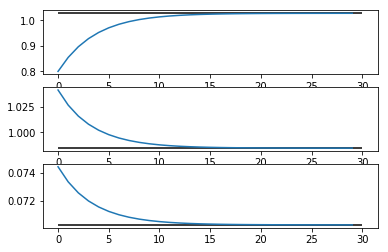

In [14]:
## plot optimal plans and check for convergence to steady state
fig, ax = plt.subplots(3,1)
ax[0].plot(range(T), kt[:-1])
ax[0].hlines(kss, 0, T)
ax[1].plot(range(T), hyt)
ax[1].hlines(hyss, 0, T)   
ax[2].plot(range(T), hmt)
ax[2].hlines(hmss, 0, T) 

## Question 4 (N)

In the last problem set, we have seen a variant of the neoclassical growth model with two capital stocks, $k$ and $q$. The production function has the following functional form:

\begin{equation}
    f(k, q, h) = A \left[ (\omega k^{\frac{\sigma - 1}{\sigma}} + (1 - \omega) q^{\frac{\sigma - 1}{\sigma}})^{\frac{\sigma}{\sigma-1}}   \right]^\alpha h^{1-\alpha}
\end{equation}

As before, we have a Cobb-Douglas production function. The first argument is a CES composite of the two capital stocks, $k$ and $q$. Recall that a CES function allows you to set an elasticity of substitution $\sigma \in [0, \infty)$ different from 1 (which would be the Cobb-Douglas case). For $\sigma < 1$, the two inputs are considered *complements*, while for $\sigma > 1$, they are *substitutes*.

The resource constraint reads:

\begin{equation}
    k_{t+1} + q_{t+1} + c_t = f(k_t, q_t, h_t) + (1 - \delta) (k_t + q_t)
\end{equation}

where we have assumed that both types of capital depreciate with the same rate $\delta$. 

In contrast to the previous problem set, the planner's problem has an infinite time horizon:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, q_{t+1}, h_t\right\}} \sum^\infty_{t = 0} \beta^t u(c_t, h_t) 
\end{equation}

s.t. the resource constraint.

Use the dynamic programming algorithm from the lecture to solve this model for the parameter values given below. Note that since there are two state variables, $k$ and $q$, the value function here is a function with two arguments. Derive approximations to the policy functions and simulate the economy for $T = 30$. Compare these time series to their corresponding steady state values.

In [15]:
## utility
beta = 0.9      # discount factor
nu = 2       # risk-aversion coefficient for consumption
eta = 1         # elasticity parameter for labor supply
B = 1

## production
alpha = 0.25
delta = 0.1
A = 1

## CES parameters
omega = 0.5
sigma = 0.8

### Answer

In [16]:
params = {'beta': beta, 'nu': nu, 'eta': eta, 'alpha': alpha, 
          'delta': delta, 'A': A, 'B': B, 'omega': omega, 'sigma': sigma }

#### Auxiliary Functions

In [17]:
def ces(k, q, pm):
    """
    Implements the CES function
    """
    rho = (pm['sigma'] - 1) / pm['sigma']
    return (pm['omega'] * k**rho + (1 - pm['omega']) * q**rho)**(1/rho)

def f(k, q, h, pm):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for k, q and h
    """
    return pm['A'] * ces(k, q, pm)**pm['alpha'] * h**(1 - pm['alpha'])


def f_diff(k, q, h, pm):
    """
    Returns the first derivative of the cobb douglas wrt k, hy and hm
    """
    rho = (pm['sigma'] - 1) / pm['sigma']
    return (pm['alpha'] * pm['A'] * h**(1 - pm['alpha']) * ces(k, q, pm)**(pm['alpha'] - rho) * pm['omega'] * k**(rho - 1) , 
            (1 - pm['alpha']) * f(k, q, h, pm) / h)

def u(c, h, pm):
    """
    Utility function
    """
    return c**(1 - pm['nu'])/(1 - pm['nu']) - pm['B'] * h**(1 + pm['eta'])/(1 + pm['eta'])

#### Compute Steady State

In [18]:
def steady(x, pm):
    """
    Returns the vector-valued function consisting of the steady-state conditions 
    """
    y = np.zeros(3)
    X = np.exp(x)
    mp = f_diff(X[0], X[1], X[2], pm)
    
    y[0] = pm['beta'] * (mp[0] + 1 - pm['delta']) - 1
    y[1] = ( f(X[0], X[1], X[2], pm) - pm['delta'] * (X[0] + X[1]))**(- pm['nu']) * mp[1] - pm['B'] * X[2]**pm['eta']
    y[2] = pm['omega'] * X[0]**((pm['sigma']- 1)/pm['sigma'] - 1) - (1 - pm['omega']) * X[1]**((pm['sigma']- 1)/pm['sigma'] - 1)
    
    return y

x0 = np.log([0.5, 0.5, 1.2])
res_ss = scipy.optimize.root(steady, x0, args = (params), method = 'broyden2' , options = {'line_search' : None, 'jac_options': {'alpha': 1}})
print(res_ss)

kss = np.exp(res_ss.x)[0]
qss = np.exp(res_ss.x)[1]
hss = np.exp(res_ss.x)[2]

print( "Steady state: (k_ss, q_ss, h_ss) = {}".format(np.exp(res_ss.x) ) )

     fun: array([ 1.40191458e-07,  3.47020848e-08, -2.36498902e-07])
 message: 'A solution was found at the specified tolerance.'
     nit: 13
  status: 1
 success: True
       x: array([-0.65239895, -0.65239912,  0.04636322])
Steady state: (k_ss, q_ss, h_ss) = [0.52079492 0.52079483 1.0474548 ]


#### Choose a grid around the steady state value for capital

In [19]:
m = 10
k_min, k_max = 0.3, 0.8
q_min, q_max = 0.3, 0.8
k_grid = fa.chebgrid(k_min, k_max, m)
q_grid = fa.chebgrid(q_min, q_max, m)

Q_grid, K_grid = np.meshgrid(q_grid, k_grid)

#### Set the degree of approximation and an initial guess for the value function

In [20]:
## set the degree of approximation
n = m - 1

## initial guess for VF
V0 = (alpha / (1 - alpha * beta)) * np.log(K_grid )
## compute implied basis coefficients
a0 = fa.chebapprox_2d(V0, [n, n])

#### Define the objective function for the optimization step (= RHS of Bellman equation)

In [21]:
def vf_rhs(x, k, q, a, k_min, k_max, q_min, q_max, pm):
    """
    RHS of the Bellman equation
    """
    kp = np.exp(x[0])
    qp = np.exp(x[1])
    h = np.exp(x[2])
    
    return (- u(f(k, q, h, pm) + (1 - pm['delta']) * (k + q) - kp - qp, h, pm) 
            - beta * np.polynomial.chebyshev.chebval2d(fa.chebconvert(kp, k_min, k_max),
                                                       fa.chebconvert(qp, q_min, q_max), a) )

#### Solve model with value function iteration

In [22]:
def opt_step(k_grid, q_grid, obj_fun, x0, a_ch, k_min, k_max, q_min, q_max, pm):     
    """
    Function that loops over all states (= elements in k_grid and q_grid) and solves the respective optimization problem (obj_fun, initial guess x0)
    for a given vector of Chebyshev basis coefficients a_ch
    -> uses Scipy's optimize module
    """
    ## initialize policy and value functions
    V = np.zeros((m, m))
    K = np.zeros((m, m))
    Q = np.zeros((m, m))
    H = np.zeros((m, m))
    
    ## loop
    for (ind1, k) in enumerate(k_grid):
        for (ind2, q) in enumerate(q_grid):
        ## optimization step
            res = scipy.optimize.minimize(obj_fun, x0, args = (k, q, a_ch, k_min, k_max, q_min, q_max, pm), method ='BFGS') 
            V[ind1, ind2] = - res.fun
            K[ind1, ind2], Q[ind1, ind2], H[ind1, ind2]  = np.exp( res.x )
            if res.success is not True:
                print(k, q, res.message)
        
    return V, K, Q, H

In [23]:
## initialize initial guess for basis coefficients and optimization
a_ch = a0.copy()
x0 = res_ss.x

eps = 1
it = 0
maxit = 300

while eps > 1e-8 and it < maxit:
    it += 1
    ## optimization step
    V, K, Q, H = opt_step(k_grid, q_grid, vf_rhs, x0, a_ch, k_min, k_max, q_min, q_max, params)
    ## fitting step
    a_new = fa.chebapprox_2d(V, [n, n])
    ## compute convergence criterion
    eps = np.linalg.norm(a_new - a_ch)
    ## update coefficients
    a_ch = a_new.copy()
    
    if it % 10 == 0:
        print(it, eps)

print(it, eps)

0.5108913837399423 0.5108913837399423 Desired error not necessarily achieved due to precision loss.
0.6634976249348867 0.7267766952966368 Desired error not necessarily achieved due to precision loss.
0.6634976249348867 0.7727516310470919 Desired error not necessarily achieved due to precision loss.
0.7267766952966368 0.6634976249348867 Desired error not necessarily achieved due to precision loss.
0.7267766952966368 0.7969220851487844 Desired error not necessarily achieved due to precision loss.
0.7727516310470919 0.6634976249348867 Desired error not necessarily achieved due to precision loss.
0.7969220851487844 0.7267766952966368 Desired error not necessarily achieved due to precision loss.
10 0.7469406320084141
20 0.26068252505610096
30 0.09089799743593065
40 0.03169424885443505
50 0.011051102893866049
60 0.0038532813536917843
70 0.0013435561326389234
80 0.000468469056354337
90 0.00016334505968984558
100 5.6954900614414355e-05
110 1.98589459365906e-05
120 6.924386671159085e-06
130 2.4

#### Simulation

In [24]:
a_k = fa.chebapprox_2d(K, [n, n])
a_q = fa.chebapprox_2d(Q, [n, n])
a_h = fa.chebapprox_2d(H, [n, n])

In [25]:
## number of periods
T = 30
k0 = 0.33

## initialize arrays to keep track of time series
kt = np.zeros(T+1)
qt = np.zeros(T+1)
ht = np.zeros(T)


## initial capital stock is given
kt[0] = k0
qt[0] = k0

## loop over time and use policy function approximations to fill kt and ht
for t in range(T):
    kt[t+1] = np.polynomial.chebyshev.chebval2d( fa.chebconvert(kt[t], k_min, k_max), fa.chebconvert(qt[t], k_min, k_max), a_k )
    qt[t+1] = np.polynomial.chebyshev.chebval2d( fa.chebconvert(kt[t], k_min, k_max), fa.chebconvert(qt[t], k_min, k_max), a_q )
    ht[t] = np.polynomial.chebyshev.chebval2d( fa.chebconvert(kt[t], k_min, k_max), fa.chebconvert(qt[t], k_min, k_max), a_h )

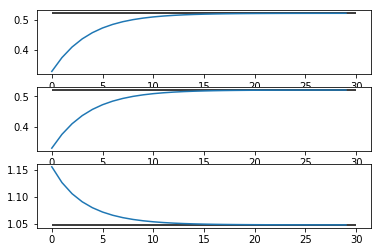

In [26]:
## plot optimal plans and check for convergence to steady state
fig, ax = plt.subplots(3,1)
ax[0].plot(range(T), kt[:-1])
ax[0].hlines(kss, 0, T)
ax[1].plot(range(T), qt[:-1])
ax[1].hlines(qss, 0, T)   
ax[2].plot(range(T), ht)
ax[2].hlines(hss, 0, T) 